In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [233]:
#Reading data into dataset

In [234]:
data=pd.read_excel('iris.xls')

In [235]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [236]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [237]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [239]:
#Preprocessing

<AxesSubplot:>

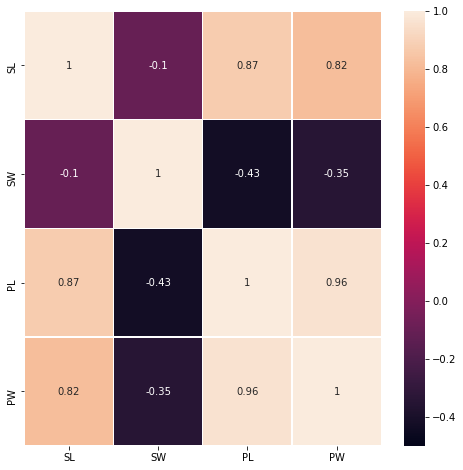

In [240]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),vmin=-0.5,vmax=1,annot=True,linewidth=0.4)

In [241]:
data1=data
data1['SL']=data1['SL'].fillna(data1['SL'].mean())
data1['SW']=data1['SW'].fillna(data1['SW'].mean())
data1['PL']=data1['PL'].fillna(data1['PL'].mode()[0])
data1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:xlabel='SW'>

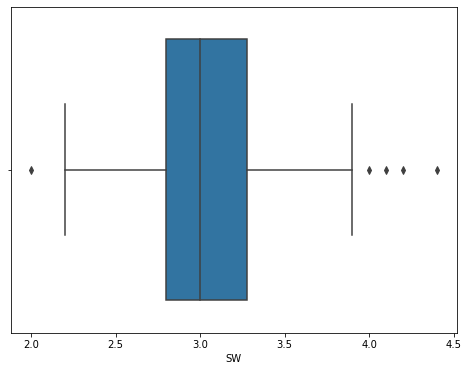

In [242]:
plt.figure(figsize=(8,6))
sns.boxplot(data1['SW'])

In [243]:
Q1=data['SW'].quantile(0.25)
Q3=data['SW'].quantile(0.75)
IQR=Q3-Q1
upperlimit=Q1+1.5*IQR
lowerlimit=Q3-1.5*IQR

In [244]:
data1[data1['SW']>upperlimit]
data1[data1['SW']<lowerlimit]

,SL,SW,PL,PW,Classification
41,4.500000,2.3,1.3,0.3,Iris-setosa
53,5.500000,2.3,4.0,1.3,Iris-versicolor
57,4.900000,2.4,3.3,1.0,Iris-versicolor
60,5.000000,2.0,3.5,1.0,Iris-versicolor
62,6.000000,2.2,4.0,1.0,Iris-versicolor
68,6.200000,2.2,4.5,1.5,Iris-versicolor
69,5.600000,2.5,3.9,1.1,Iris-versicolor
80,5.500000,2.4,3.8,1.1,Iris-versicolor
81,5.500000,2.4,3.7,1.0,Iris-versicolor
87,6.300000,2.3,4.4,1.3,Iris-versicolor


In [245]:
newdata=data1[data1['SW']<upperlimit]
newdata.shape

(133, 5)

<AxesSubplot:xlabel='SW'>

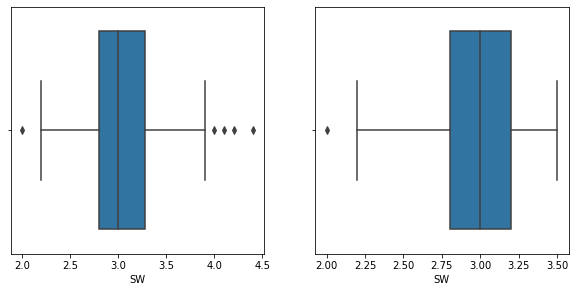

In [246]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data1['SW'])
plt.subplot(2,2,2)
sns.boxplot(newdata['SW'])

In [247]:
print(data1['PW'].skew())

-0.10499656214412734


In [248]:
data1['PW'].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PW, dtype: float64

In [320]:
data1['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Classification, dtype: int64

In [322]:
data1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [323]:
y=pd.DataFrame(data['Classification'])

In [324]:
#Splitting data

In [325]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [326]:
x_train.shape

(120, 4)

In [327]:
y_train.shape

(120, 1)

In [328]:
x_test.shape

(30, 4)

In [329]:
y_test.shape

(30, 1)

In [338]:
#Building model
#KNN Model

In [331]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [332]:
acc_values

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [333]:
classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [337]:
print('Accuracy is'),accuracy_score(y_test,y_pred)

Accuracy is


(None, 1.0)

In [335]:
#Random forest classifier 

In [260]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [261]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [262]:
from sklearn.metrics import confusion_matrix

In [263]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]], dtype=int64)

In [267]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PW    51.127627
PL    34.766120
SL    10.524000
SW     3.582253
dtype: float64